# How To Tell If Options Are Cheap With Volatility Cones


The hardest part of options [trading](https://pyquantnews.com/trading/) is determining if they are cheap or expensive. Whether you buy or sell an option, you’re exposed to the volatility of the underlying. That’s why it’s important to compare volatility to its recent levels.

Volatility cones can help you do this.

I’m going to show you how using Python. We’ll grab price data, compute realized volatility, and do some charting with Matplotlib.

Let’s get started.

## Step 1: Import The Required Libraries
I’m using Jupyter Notebook. I want to plot my charts inline, so I call <i>%matplotlib inline</i> first.

We’ll start by importing the libraries we need.

In [1]:
%matplotlib inline

import math

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from openbb_terminal.sdk import openbb

## Step 2: Setup The Variables
Next, we’ll setup some variables we’ll use later. These are all Python lists. <i>windows</i> defines the number of days I want to use to compute volatility. <i>quantiles</i> defines the percentage of the top and bottom 25% of values. The last few lists are where we accumulate data to plot.

In [2]:
windows = [30, 60, 90, 120]
quantiles = [0.25, 0.75]

max_ = []
min_ = []
top_q = []
median = []
bottom_q = []
realized = []

Let’s get some data.



In [6]:
data = openbb.stocks.load("JPM", start_date="2020-01-01", end_date="2020-12-31")

Loading Daily data for JPM with starting period 2020-01-02.

As usual, we’ll use yfinance to get stock data – in this case, JPM. You can use any stock and any price range you want.



## Step 3: Realized Volatility
Realized volatility is a measurement of how much the price or returns of stock vary. It’s used to optimize portfolios, detect regime changes, and price derivatives. The most common way to measure realized volatility is the standard deviation.

If you’d like to check out other ways to compute realized volatility, you can do that [here](https://preview.convertkit-mail2.com/click/dpheh0hzhm/aHR0cHM6Ly9weXF1YW50bmV3cy5jb20vcHFuLTAwMi1ob3ctdG8tY29tcHV0ZS12b2xhdGlsaXR5LTYtd2F5cy8=) (for free).



In [7]:
def realized_vol(price_data, window=30):

    log_return = (price_data["Close"] / price_data["Close"].shift(1)).apply(np.log)

    return log_return.rolling(window=window, center=False).std() * math.sqrt(252)

The next step is to loop through each of the windows and compute realized volatility over each time frame. <i>estimator</i> is a pandas DataFrame. That’s why it’s so easy so compute the min, max, median, and quantiles. Magic.



In [8]:
for window in windows:
    
    estimator = realized_vol(window=window, price_data=data)
    
    max_.append(estimator.max())
    top_q.append(estimator.quantile(quantiles[1]))
    median.append(estimator.median())
    bottom_q.append(estimator.quantile(quantiles[0]))
    min_.append(estimator.min())
    realized.append(estimator[-1])

## Step 4: Plot The Results
The last step is to create a chart that plots the volatility cone.

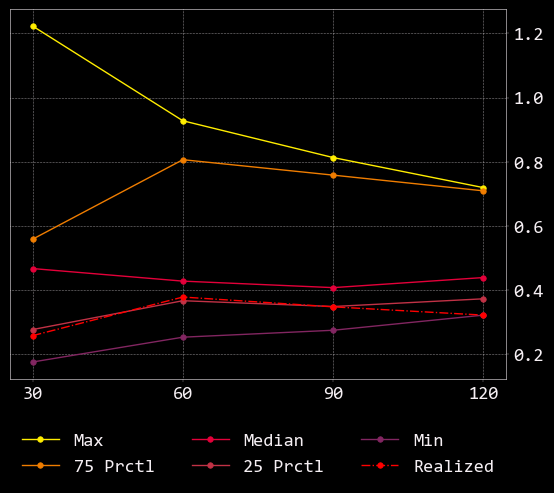

In [9]:
# create the plots on the chart
plt.plot(windows, max_, "-o", linewidth=1, label="Max")
plt.plot(windows, top_q, "-o", linewidth=1, label=f"{quantiles[1] * 100:.0f} Prctl")
plt.plot(windows, median, "-o", linewidth=1, label="Median")
plt.plot(windows, bottom_q, "-o", linewidth=1, label=f"{quantiles[0] * 100:.0f} Prctl")
plt.plot(windows, min_, "-o", linewidth=1, label="Min")

plt.plot(windows, realized, "ro-.", linewidth=1, label="Realized")

# set the x-axis labels
plt.xticks(windows)

# format the legend
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3)

The first 6 lines create the lines on the chart. The other two align the x-axis labels and format the legend.


<AxesSubplot: xlabel='date'>

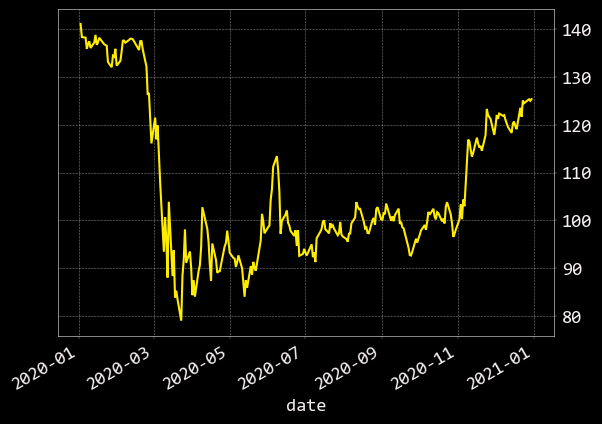

In [10]:
data.Close.plot()

## Step 5: Analyze The Results
The y-axis is the realized volatility over each time frame. The x-axis is time frame we use to compute the realized volatility.

There are three conclusions you can draw from this chart:

1. Over the 30-day window, there is a spike in realized volatility. Realized volatility spikes usually correspond to a drop in the stock price. This should tell us to explore the stock price to see what happened.
2. Realized volatility (the dashed line) is close to the lowest it’s been across all time frames. This is a data point to support a case to get long volatility (i.e. options are cheap).
3. Realized volatility is mean reverting. You can see this in the cone shape of the chart. This is a data point to support a case to get long volatility.